In [ ]:
# Η  δυναμική  συμπεριφορά  του  συστήματος  περιγράφεται  από  τις  ακόλουθες  διαφορικές εξισώσεις 

# F(t) = m * xdotdot + c * xdot + k * x (1) 
# xdot =  u (2) 
#Είσοδος  στο  σύστημα  θεωρείται  η  δύναμη  F(t)  η  οποία  περιγράφεται  από  την  σχέση 
# F(t) = Fo * sin( w * t ) 
# Οι αρχικές συνθήκες είναι: x(0) = 0 και xdot(0) = 0 
# Εάν δίνονται: k=95, , c=1.2, m=1.7, Fo=4.5, ω=4.5 να δημιουργήσετε πρόγραμμα προσομοίωσης 
# του συστήματος σε γλώσσα Python, για τη χρονική διάρκεια   to = 0 sec  έως  tend = 10 end με βήμα 
# dt = 0.1 sec και να δημιουργήσετε τα γραφήματα θέσης και ταχύτητας για την ανωτέρω χρονική διάρκεια

In [2]:
#Kaloume tis aparaitites vivliothikes pou tha xreiastoun gia thn prosomoiosh tou sustimatos mas.

import math as m                           
import matplotlib.pylab as pylab 
from scipy.integrate import odeint 
from pylab import arange , array 

In [3]:
def MassSpringDamper ( state , t ):
   
    # I stathera tou elatiriou,monada metrisis einai ta kN/m
    K  = 95        
    # I maza tou sustimatos,monada metrisis einai ta Kg
    M  = 1.7    
    # Suntelestis aposvesis tou sustimatos
    C  = 1.2 
    # I dunamh pou askeitai sto susthma mas, monada metrisis einai ta N
    Fo = 4.5                                   
    # I suxnotita tis kinisis
    W  = 4.5                                   
    # I metatopisi orizetai os x kai i taxitita orizetai ws x'
    # I epitaxinsi orizetai os xdd = x''
    x , xd = state            
    # I sunartisi tis dunamis pou akseitai sto susthma mas se sunartisi me ton xrono t
    F = Fo * m.sin( W * t )                    
    # I deuterovathmia diaforikh eksisosh tou sustimatos pou perigrafei tin kinisi kai tin opoia lunoume, 
    # prokuptei afou lusoume os pros thn epitaxunsi thn arxiki sunartisi (1) ths askhshs 
    xdd = (F/M) - (C/M) * xd - (K/M) * x        
    # I sunartisi mas, mas epistrefei tin taxutita kai tin epitaxunsi tou sustimatos mas
    return [ xd , xdd ]                       

In [4]:
# Oi arxikes sunthikes tou susthmatos einai x(0) = 0 kai xd(0) = 0, monades metrisis einai [m, m/sec] antistoixa 
# kai einai autes pou arxikopoioume to state
state = [0.0 , 0.0]                            
# I arxiki stigmi pou ksekinaei to susthma thn kinisi tou
t_start = 0.0    
# I teliki stigmi pou teleiwnei to susthma thn kinisi tou
t_end = 10.0                                   
# To vima ths xronikis diarkeias, diladi poso grigora auksanetai o xronos sthn prosomoiosi mas
t_step = 0.1                                   

t = arange ( t_start , t_end , t_step )

state = odeint ( MassSpringDamper , state , t )

# array einai mia eidikh metavliti sthn python i opoia mporei na apothikeuesei polles arithimitikes times tautoxronos 
# kai einai eukola na thn kalesoume kai na thn epeksergastoume.
# Oi times tis metatopisis apothikeuontai sthn metavliti x kai sthn proti array
x = array ( state [:,[0]])                    
# Oi times tis taxutitas apothikeuontai sthn metavliti xd kai sthn deuteri array
xd = array (state [:,[1]])                    

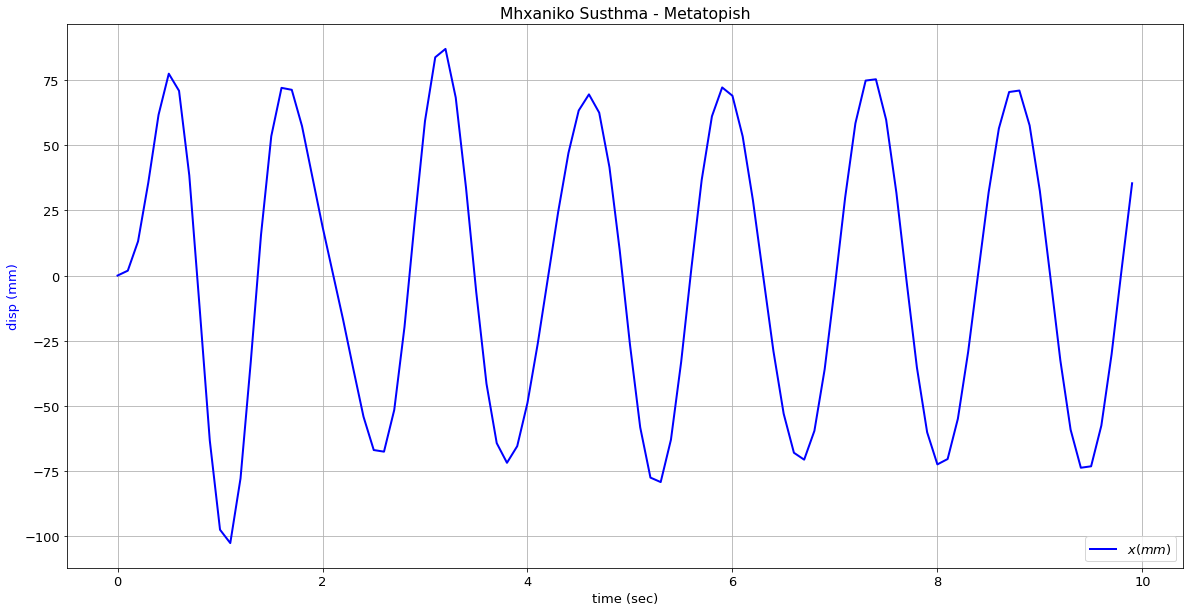

In [5]:
# Oi diastaseis tou grafimatos mas einai x = 20 and y = 10
pylab.rcParams['figure.figsize'] = (20, 10)        
# To megethos ths grammatoseiras tou grafimatos
pylab.rcParams['font.size'] = 13                                       

fig, ax1 = pylab.subplots()
# I grafikh parastash ths metaposisis parousiazetai me mple xrwma kai to paxos tou grafhmatos = 2.0 
# Xrhsimopoioume to '1e3' gia na exoume pio akrivei apotelesmata gia thn metavlhti x 
# kai to (r'$x (mm)$') gia na apotuposoume pano sto grafima thn monada metrisis
ax1.plot(t, x*1e3,'b',label = r'$x (mm)$', linewidth=2.0)                
# I thesh tou pinaka opou parousiazetai i monada metrisis tis metatopisis (mm) vrisketai katw deksia tou grafimatos
ax1.legend(loc='lower right')                                          
  # O aksonas x antistoixei stin xroniki diarkeia tis kinisis pou meletame kai exei os monada metrisis ta deuterolepta (sec)
ax1.set_xlabel('time (sec)')    
# O aksonas y antistoixei stin metatopisi tis kinisis pou meletame kai exei os monada metrisis ta xiliosta (mm).
ax1.set_ylabel('disp (mm)',color='b')                                    
# O titlos tou grafimatos pou antisoixei sthn metatopisi tou susthmatos
pylab.title(' Mhxaniko Susthma - Metatopish ')                           
pylab.grid()

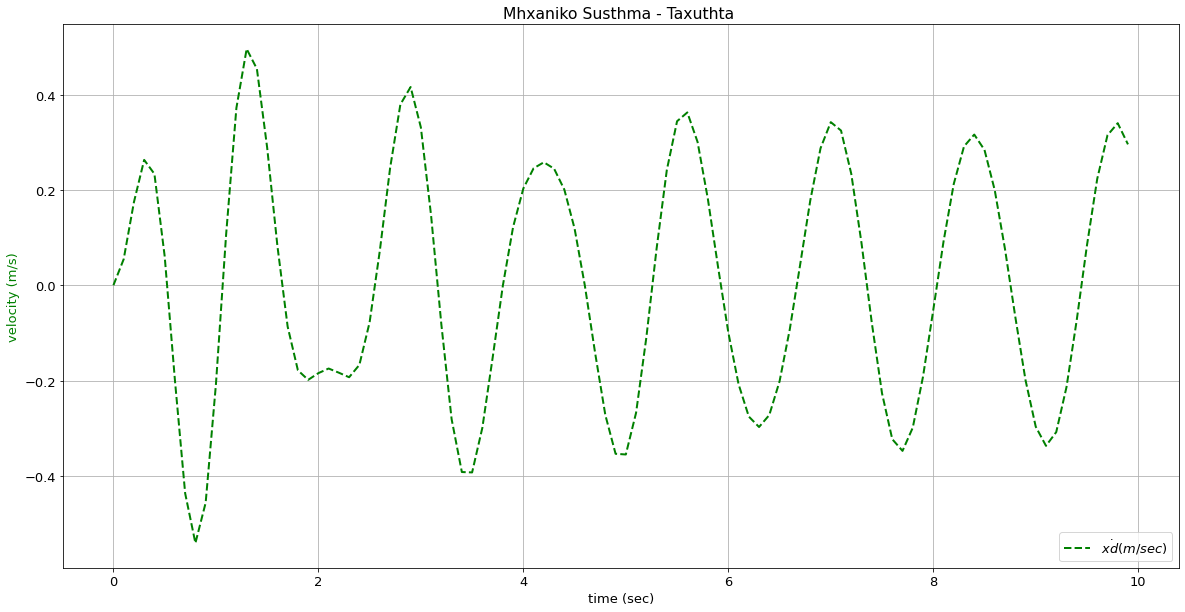

In [6]:
# Oi diastaseis tou grafimatos mas einai x = 20 and y = 10
pylab.rcParams['figure.figsize'] = (20, 10) 
# To megethos ths grammatoseiras tou grafimatos
pylab.rcParams['font.size'] = 13                                   

fig, ax2 = pylab.subplots()
# I grafikh parastasi ths metaposishs parousiazetai me prasino xrwma kai diekekomenes paules kai to paxos tou grafhmatos einai 2.0
# Episis xrisimopoioume to (r'$\dot{x} (m/sec)$') gia na apotiposoume pano sto grafima thn monada metrisis. 
ax2.plot(t, xd,'g--', label = r'$\dot{xd} (m/sec)$', linewidth=2.0)  
# I thesh tou pinaka opou parousiazetai i monada metrisis tis taxititas (m/sec) vrisketai kato deksia tou grafimatos.
ax2.legend(loc='lower right')                                           
# O aksonas x antistoixei stin xronikh diarkeia tis kinisis pou meletame kai exei os monada metrisis ta deuterolepta (sec).
ax2.set_xlabel('time (sec)')   
# O aksonas y antistoixei stin taxutita ths kinisis pou meletame kai exei os monada metrisis ta xiliosta (m/sec).
ax2.set_ylabel('velocity (m/s)',color='g')                               

# O titlos tou grafimatos pou antisoixei sthn metatopisi tou susthmatos
pylab.title(' Mhxaniko Susthma - Taxuthta  ')                           
pylab.grid()

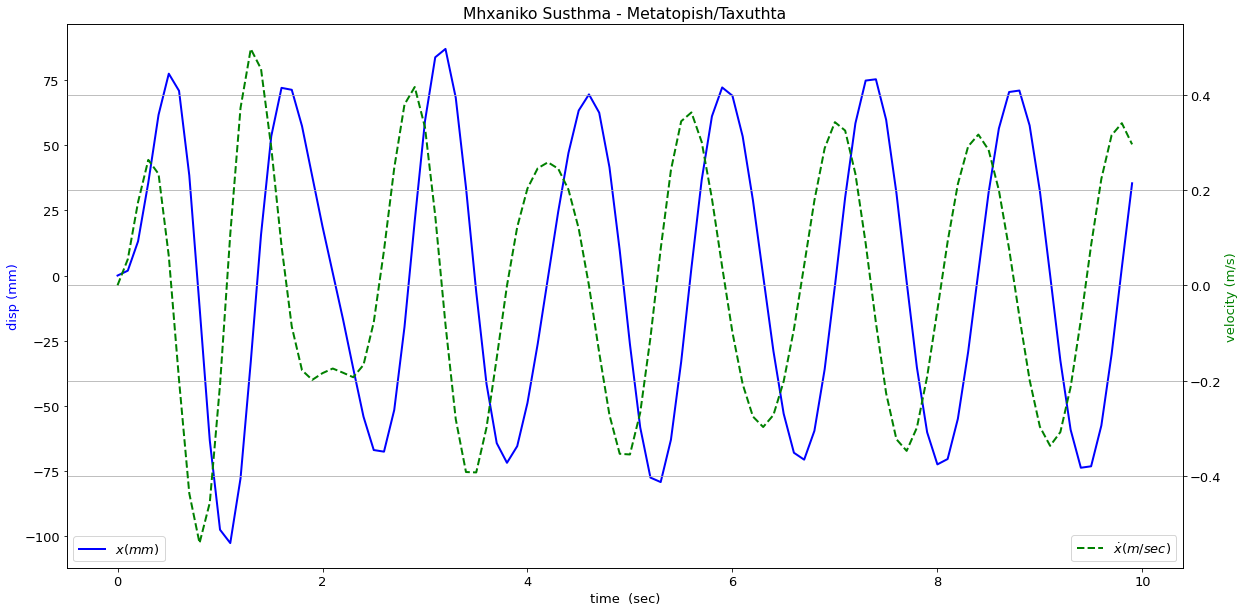

In [7]:
# Parousiazontai oi duo grafikes parastaseis sto idio grafhma gia thn kaluterh apokomisei sumperasmatwn.
# Kai oi duo grafikes parastaseis ksekinane apo to mhden wstoso se auto to grafhma uparxei mia mikrh metatopish ston aksona y pros 
# ta pano prokeimenou na parousiastoun 
# kai ta duo grafimata me tis swstes times.
# Den apotelei lathos i sugkekrimeni diaforopoiisi afoy ginetai apo tin python sthn prospatheia ths na dhmiorghsei ta duo 
# grafimata se ena.


pylab.rcParams['figure.figsize'] = ( 20, 10)       
pylab.rcParams['font.size'] = 13

fig, ax1 = pylab.subplots()
ax2 = ax1.twinx()

ax1.plot(t, x*1e3,'b',label = r'$x (mm)$', linewidth=2.0)
ax2.plot(t, xd,'g--', label = r'$\dot{x} (m/sec)$', linewidth=2.0)

ax2.legend(loc='lower right')
ax1.legend(loc='lower left')

ax1.set_xlabel('time  (sec)')
ax1.set_ylabel('disp (mm)',color='b')

ax2.set_ylabel('velocity (m/s)',color='g')

pylab.title(' Mhxaniko Susthma - Metatopish/Taxuthta ')
pylab.grid()